In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file_path = r'C:\Users\msyeu\New-York-Citibike-Analysis-2022\merged_citibike_weather.csv'

In [12]:
dtype_spec = {'column_name_5': str, 'column_name_7': str}

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'Date', 'AvgTemp(C)', '_merge'],
      dtype='object')

In [16]:
dtype_spec = {
    'start_station_id': str,
    'end_station_id': str
}

In [20]:
chunk_size = 100000

In [22]:
chunks = []

In [24]:
for chunk in pd.read_csv(file_path, dtype=dtype_spec, chunksize=chunk_size, low_memory=False):
    chunks.append(chunk.sample(frac=0.25, random_state=42))

In [26]:
df_subset = pd.concat(chunks)

In [28]:
df_subset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Date,AvgTemp(C),_merge
75721,965418C181620CB4,classic_bike,2022-01-18 14:00:12.725,2022-01-18 14:17:41.984,McGuinness Blvd & Eagle St,5977.01,Bedford Ave & Nassau Ave,5550.05,40.735550,-73.952840,40.723117,-73.952123,member,2022-01-18,NaN,NaN,left_only
80184,132457B39E20CC44,classic_bike,2022-01-14 19:52:33.385,2022-01-14 19:59:40.533,Nassau Ave & Russell St,5581.01,N 6 St & Bedford Ave,5379.10,40.725570,-73.944340,40.717452,-73.958509,member,2022-01-14,NaN,NaN,left_only
19864,3C9B0279F0F50C75,electric_bike,2022-01-12 14:20:43.772,2022-01-12 14:29:31.226,E 27 St & 1 Ave,6004.06,W 31 St & 7 Ave,6331.01,40.739445,-73.976806,40.749156,-73.991600,member,2022-01-12,NaN,NaN,left_only
76699,BADC3301E1116CFA,electric_bike,2022-01-13 07:35:42.436,2022-01-13 07:40:49.534,Grand Army Plaza & Central Park S,6839.10,E 41 St & Madison Ave (SE corner),6432.10,40.764397,-73.973715,40.752049,-73.979635,member,2022-01-13,NaN,NaN,left_only
92991,28C5884CF09647AB,classic_bike,2022-01-28 19:05:48.598,2022-01-28 19:22:45.992,E 33 St & 1 Ave,6197.08,Cleveland Pl & Spring St,5492.05,40.743227,-73.974498,40.722104,-73.997249,member,2022-01-28,NaN,NaN,left_only


In [30]:
df_subset.shape

(7459702, 17)

In [32]:
df_weather = pd.read_csv('laguardia_weather_2022.csv') 

In [34]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'], errors='coerce')

In [36]:
df_weather.set_index('Date', inplace=True)

<Axes: title={'center': 'Average Temperature in 2022'}, xlabel='Date', ylabel='Avg Temp (C)'>

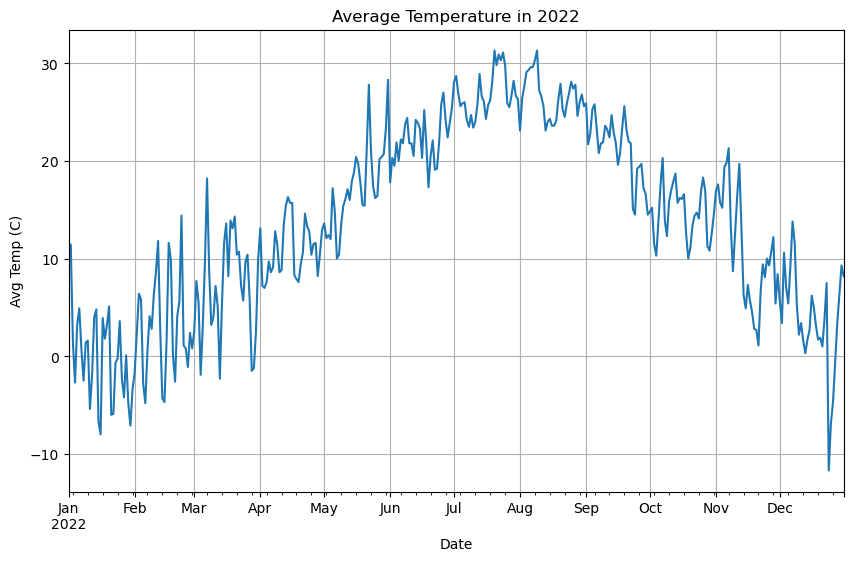

In [38]:
df_weather['AvgTemp(C)'].plot(figsize=(10, 6), title='Average Temperature in 2022', xlabel='Date', ylabel='Avg Temp (C)', grid=True)

In [56]:
# Load the weather data CSV file, ensuring the 'Date' column is parsed as a date
df_weather = pd.read_csv('laguardia_weather_2022.csv', parse_dates=['Date'])

In [58]:
df_weather.head()

,Date,AvgTemp(C)
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


In [81]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [83]:
df_weather['Date'] = pd.to_datetime(df_weather['Date']).dt.date

In [85]:
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [87]:
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

In [89]:
df_merged = pd.merge(df_weather, df_group, left_on='Date', right_on='date', how='outer')

In [91]:
df_merged.head()

,Date,AvgTemp(C),date,bike_rides_daily
0,2022-01-01,11.6,2022-01-01,20428
1,2022-01-02,11.4,2022-01-02,43009
2,2022-01-03,1.4,2022-01-03,33189
3,2022-01-04,-2.7,2022-01-04,36842
4,2022-01-05,3.2,2022-01-05,34230


In [93]:
df_merged.drop(columns=['date'], inplace=True)

In [95]:
df_merged.head()

,Date,AvgTemp(C),bike_rides_daily
0,2022-01-01,11.6,20428
1,2022-01-02,11.4,43009
2,2022-01-03,1.4,33189
3,2022-01-04,-2.7,36842
4,2022-01-05,3.2,34230


In [117]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

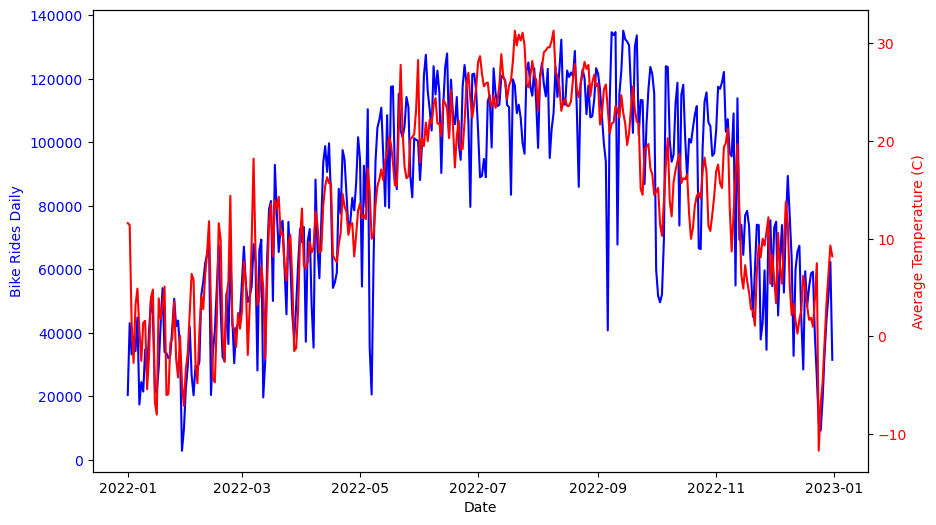

In [133]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_merged['Date'], df_merged['bike_rides_daily'], color='blue', label='Bike Rides Daily')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bike Rides Daily', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(df_merged['Date'], df_merged['AvgTemp(C)'], color='red', label='Avg Temp (C)')
ax2.set_ylabel('Average Temperature (C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

### Explanation of the Code

In this code, I used **Matplotlib** to create a line chart with dual y-axes, allowing me to plot two variables (bike rides per day and average temperature) on different scales. The primary y-axis represents the bike rides, while the secondary y-axis represents the average temperature.

1. **Creating the Figure and Axes**: 
   - I used `plt.subplots()` to create a figure (`fig`) and an axis (`ax1`). This axis (`ax1`) is responsible for plotting the bike rides.
   
2. **Adding a Second Y-Axis**:
   - I used the `twinx()` function to create a second axis (`ax2`) that shares the same x-axis (dates). This allows me to plot the average temperature on a separate y-axis while still using the same x-axis.
   
3. **Plotting the Data**:
   - The bike rides are plotted in blue on the primary y-axis, and the temperature is plotted in red on the secondary y-axis. Each axis has its own labels and tick colors to differentiate between the two data series.
   
4. **Customization**:
   - The `tick_params()` function was used to ensure that the tick labels are colored according to the data they represent (blue for bike rides and red for temperature).

### Paradigm Used

I used the **Object-Oriented (OO) approach** of Matplotlib, which provides more control and flexibility over the plot's components. This paradigm allows for the creation of multiple axes and customized styling by interacting directly with axis objects (`ax1`, `ax2`). The OO approach is preferred for more complex plots like this one, where different elements (dual axes) need to be controlled independently.
